<img src = "images/3_logos.png" width = 600, align = "center">
<br>
<h1 align=center>Tout le monde veut aller au Canada</h1>

Ce notebook explore un jeu de données sur l'immigration au Canada. Les statistiques sont fournies par l'ONU et contiennent des données annuelles sur les flux de migrants enregistrées par les pays de destination.[Source](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml)

### Pre-process

Importer les librairies et charger le jeu de données dans un dataFrame. Ne charger que la feuille de calcul :"Canada by Citizenship" en supprimant les lignes inutiles en début et en fin de feuille.

In [1]:
import pandas as pd
import numpy as np

In [2]:
canada=pd.read_excel("C:/Users/Dell/Desktop/td_python/canada/data/Canada.xlsx", sheet_name="Canada by Citizenship", skiprows=20)

Afficher les 5 premières lignes.

In [3]:
canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Supprimer les colonnes 'AREA', 'REG', 'DEV', 'Type', 'Coverage' et 'DevName' ne seront pas utiles dans ce notebook.<br>
Renommer ensuite les colonnes 'OdName'=>'Pays' , 'AreaName'=>'Continent' et 'RegName'=>'Region'

In [4]:
canada=canada.drop(columns=['AREA', 'REG', 'DEV', 'Type', 'Coverage', 'DevName'])
canada.head()

,OdName,AreaName,RegName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [5]:
canada=canada.rename(index=str, columns={'OdName': 'Pays' , 'AreaName': 'Continent' , 'RegName': 'Region'})
canada.head()

,Pays,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


Indexez le dataFrame par la colonne 'Pays>

In [6]:
canada=canada.set_index('Pays')
canada.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Pays,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,0,1,1,0,0,0,0,1,1


Ajoutez une colonne 'Total' affichant le total d'immigrants par pays.

In [7]:
canada['Total']=canada.sum(axis=1, numeric_only=True)
canada.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pays,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


### Visualisations

Paramétrage

In [8]:
# Affichage des graphiques dans le navigateur
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optionel: pour utiliser le style de ggplot

**1. Line Plot (Courbe)**

Qu'est-ce qu'un *Line Plot* et quand l'utiliser?

Il s'agit ni plus ni moins que d'une série de points de données appelés «marqueurs» reliés par des segments de droite.<br>Ce type de graphique est très adapté aux données continues et c'est aussi le plus adapté pour repésenter les tendances sur une période donnée.

Exemple :

En 2010, Haïti a subi un séisme catastrophique de magnitude 7,0. Le séisme a provoqué des dégâts considérables et des pertes en vies humaines et environ trois millions de personnes ont été touchées par cette catastrophe naturelle. Dans le cadre des efforts humanitaires du Canada, le gouvernement du Canada a intensifié ses efforts pour accepter les réfugiés d'Haïti. Nous pouvons rapidement visualiser cet effort en utilisant un tracé linéaire:

Plusieurs étapes sont nécessaires : 
 - Extraire les données correspondantes à 'Haiti'
 - Transtyper le type associé aux valeurs de l'index en int
 - Créer un graphique de type 'line'
 - Définir le titre : 'Immigration depuis Haiti'
 - Donner un titre aux axes : x : 'Années' et y : 'Nombre d'imigrants'
 - Afficher le graphique

In [9]:
#Extraction des données
h=canada.loc["Haiti"]
Haiti = pd.DataFrame(h)
Haiti.drop(['Continent','Region','Total'], inplace=True)

#Transtypage 
Haiti.astype('int')
Haiti

,Haiti
1980,1666
1981,3692
1982,3498
1983,2860
1984,1418
1985,1321
1986,1753
1987,2132
1988,1829
1989,2377


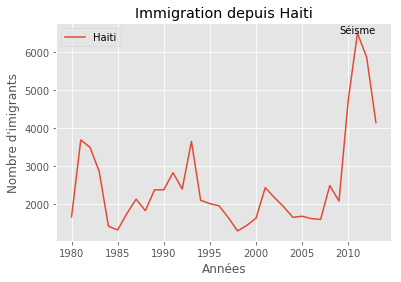

In [10]:
#Création du graphique
Haiti.plot(kind='line')

#Titre et légendes
plt.title('Immigration depuis Haiti')
plt.ylabel('Nombre d\'imigrants')
plt.xlabel('Années')

#Ajout information pic
plt.text(2009, 6500, 'Séisme')

#Visualisation
plt.show() 

Le pic correspondant à la catastrophe est bien visible sur le graphique. Il convient d'ajouter des annotations : utiliser la commande plt.text(x,y,texte) pour ajouter une information au pic.

**Question** : Comparer le nombre d'immigrant au Canada provenant d'Inde à ceux provenant de Chine de 1983 à 2013

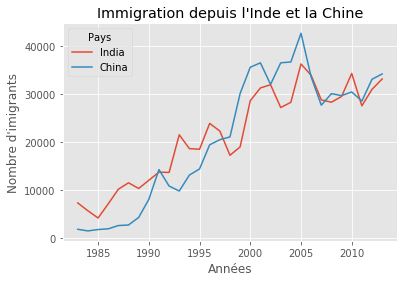

In [11]:
#Extraction des données
df = canada.loc[['India','China']]
df = df.transpose()
df.drop(['Continent', 'Region','Total'], inplace=True)
df=df.iloc[3::,:]
df.astype('int')

#Création du graphique
df.plot(kind='line')

#Titre et légendes
plt.title('Immigration depuis l\'Inde et la Chine')
plt.ylabel('Nombre d\'imigrants')
plt.xlabel('Années')

#Visualisation
plt.show()

Conclusion : 

Les flux migratoire des 2 pays sont similaires et s'entrcroisent souvent.

Comparer maintenant le flux migratoire de 1983 à 2013 des cinq pays ayant eu le plus de migrants vers le Canada sur les 20 ans.

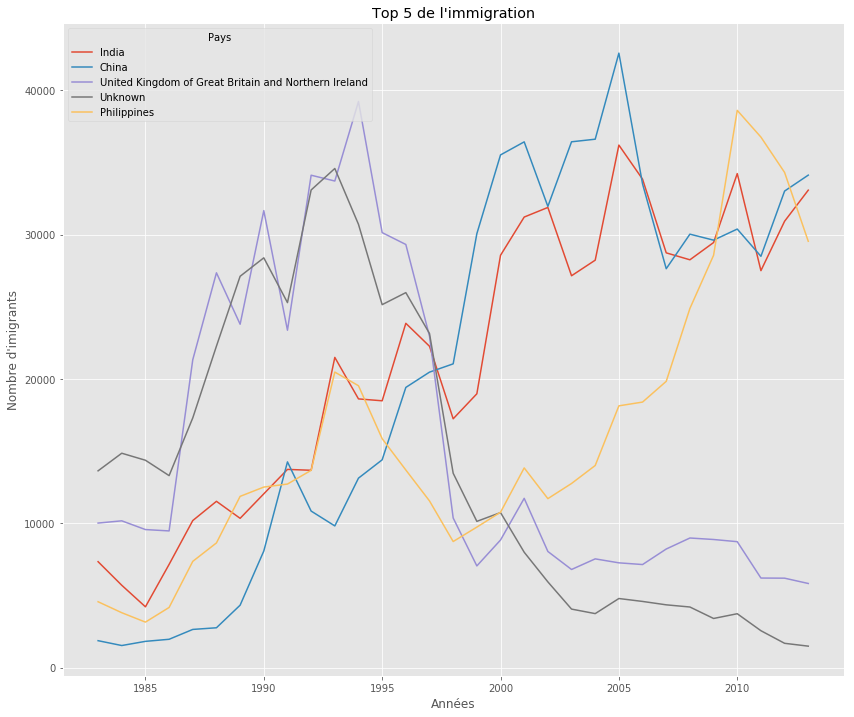

In [12]:
#Extraction des données
canada.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top5 = canada.head(6)
top5 = top5.transpose()
top5.drop(['Continent', 'Region','Total'], inplace=True)
top5=top5.iloc[3::,1::]
top5.astype('int')
top5

#Création du graphique
top5.plot(kind='line', 
          figsize=(14,12)
         )

#Titre et légendes
plt.title('Top 5 de l\'immigration')
plt.ylabel('Nombre d\'imigrants')
plt.xlabel('Années')

#Visualisation
plt.show()

**2. Area Plot (Graphique en aires empilées)**

Plus lisible que le dernier graphique, le graphique en aires empilées (stacked line plot ou Area plot) est préferable lorqu'on représente plusieurs séries sur la même figure.<br>
Le *Area plot* a une transparence réglée par défaut à 0,5 et e paramètre *stacked* permet de définir si les aires sont empilées ou non (True par défaut).

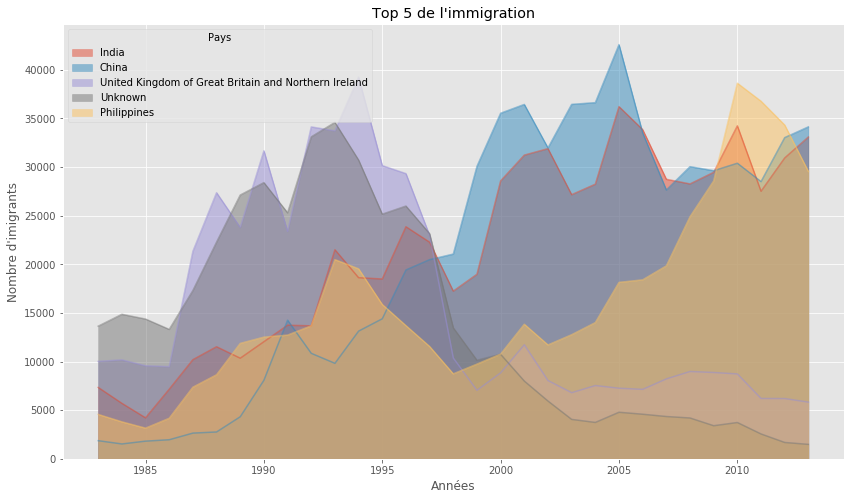

In [13]:
#Extraction des données
canada.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top5 = canada.head(6)
top5 = top5.transpose()
top5.drop(['Continent', 'Region','Total'], inplace=True)
top5=top5.iloc[3::,1::]
top5.astype('int')
top5

#Création du graphique
top5.plot(kind='area', 
          stacked=False, 
          figsize=(14,8)
         )

#Titre et légendes
plt.title('Top 5 de l\'immigration')
plt.ylabel('Nombre d\'imigrants')
plt.xlabel('Années')

#Visualisation
plt.show()

**Question** : Représenter avec une transparence de 0.45 les 5 pays ayant le moins migrants au Canada sur la période 1980 - 2013

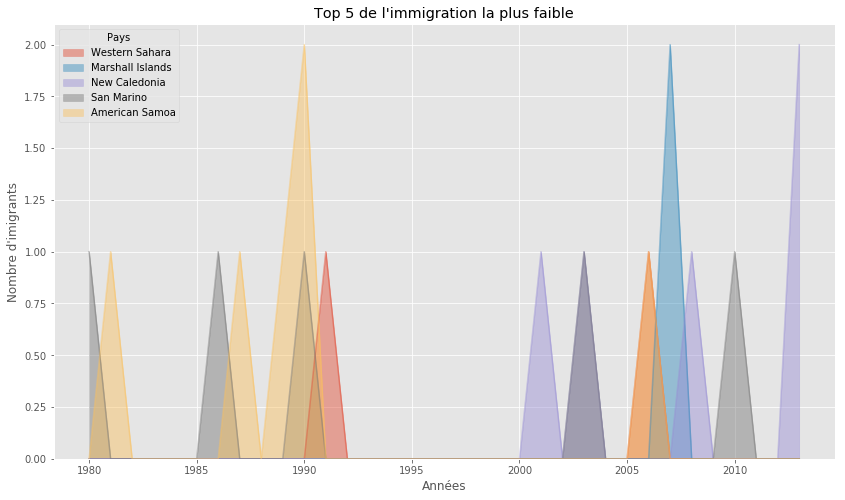

In [14]:
#Extraction des données
canada.sort_values(by='Total', ascending=True, axis=0, inplace=True)
top5_min = canada.head(6)
top5_min = top5_min.transpose()
top5_min.drop(['Continent', 'Region','Total'], inplace=True)
top5_min=top5_min.iloc[:,1::]
top5_min.astype('int')
top5_min

#Création du graphique
top5_min.plot(kind='area', 
              stacked=False, 
              alpha=0.45, 
              figsize=(14,8)
             )

#Titre et légendes
plt.title('Top 5 de l\'immigration la plus faible')
plt.ylabel('Nombre d\'imigrants')
plt.xlabel('Années')

#Visualisation
plt.show()

**3. Les histogrammes**

Un histogramme est un moyen de représenter la distribution de fréquence d'un jeu de données numériques.<br>
Fonctionement : l’axe des x est découpé en intervalles, puis on compte le nombre de points de données attribués à chaque intervalle.<br>
L'axe des ordonnées est donc la fréquence ou le nombre de points de données dans chaque groupe.<br>
Le nombre d'intervalles **bins** (10 par défaut) est paramétrable et permet d'affiner la représentation.

Quelle est la distribution de fréquence du nombre de nouveaux immigrants de divers pays au Canada en 2013 ?

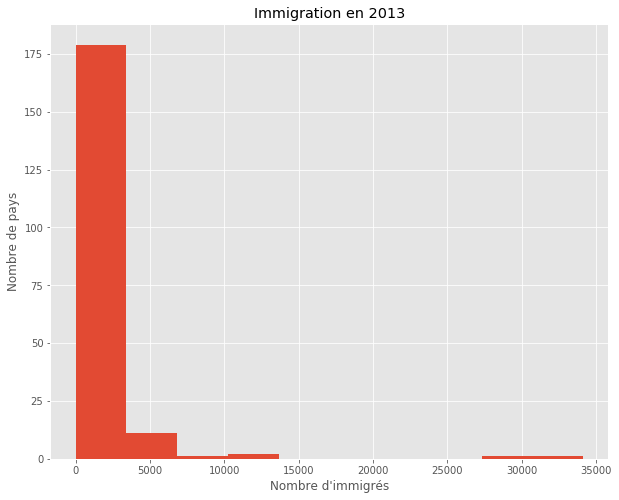

In [15]:
#Extraction des données
immi_2013=canada.iloc[:195,35]

#Création de l'histogramme
immi_2013.plot(kind='hist', 
               figsize=(10, 8)
              )

#Titre et légendes
plt.title('Immigration en 2013') 
plt.ylabel('Nombre de pays') 
plt.xlabel('Nombre d\'immigrés') 

#Visualisation
plt.show()

2 variables sont définies : nb et bornes_sup

In [16]:
#Extraction des données
nb, bornes_sup = np.histogram(canada.iloc[:195,35])
 
print(nb)
print(bornes_sup) 

[179  11   1   2   0   0   0   0   1   1]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Concrétement, numpy a découpé les valeurs en 10 intervalles de mêmes amplitudes (3412.9) et on compte 178 observations comprises entre 0 et 3412.9

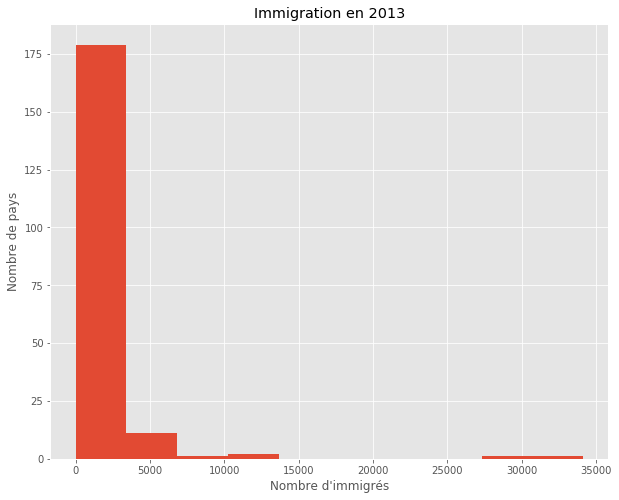

In [17]:
#Création de l'histogramme
canada.iloc[:195,35].plot(kind='hist', 
                          figsize=(10, 8)
                         )

#Titre et légendes
plt.title('Immigration en 2013') 
plt.ylabel('Nombre de pays') 
plt.xlabel('Nombre d\'immigrés') 

#Visualisation
plt.show()

La plupart du temps les graduations ne sont pas alignées avec le découpage des intervalles, mais il est possible d'améliorer le graphique en définissant le paramètre xticks

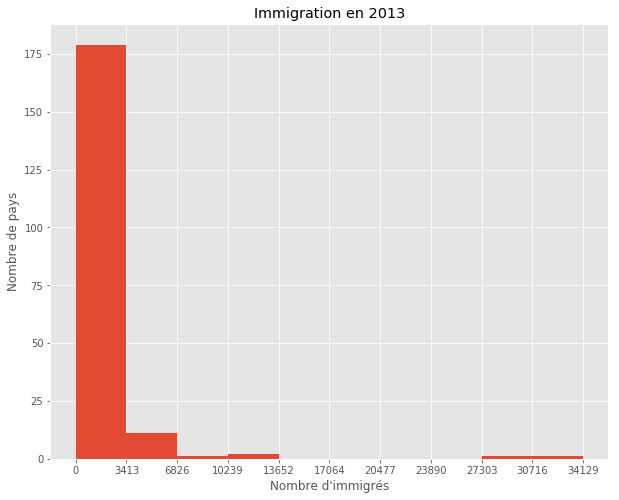

In [18]:
#Extraction des données
nb, bornes_sup = np.histogram(canada.iloc[:195,35])

#Création de l'histogramme
canada.iloc[:195,35].plot(kind='hist', 
                          figsize=(10, 8), 
                          xticks=bornes_sup
                         )

#Titre et légendes
plt.title('Immigration en 2013') 
plt.ylabel('Nombre de pays') 
plt.xlabel('Nombre d\'immigrés') 

#Visualisation
plt.show()

**Exercice**
Créer un histogramme représentant les flux migratoires vers le Canada depuis le Danemark, la norvège et la Suéde

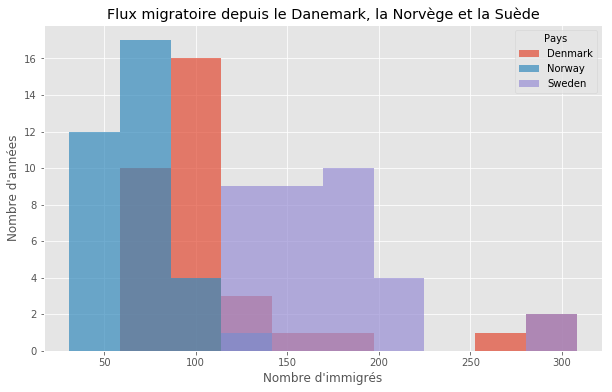

In [19]:
# Extractation des données
flux_migratoire = canada.loc[['Denmark', 'Norway', 'Sweden']].transpose()
flux_migratoire.drop(['Continent', 'Region','Total'], inplace=True)
flux_migratoire.astype('int')
flux_migratoire

 
# Création du graphique
flux_migratoire.plot(kind='hist', 
                     figsize=(10, 6), 
                     alpha=0.7
                    )

#Titre et légendes
plt.title('Flux migratoire depuis le Danemark, la Norvège et la Suède') 
plt.ylabel('Nombre d\'années') 
plt.xlabel('Nombre d\'immigrés')

#Visualisation
plt.show()

In [20]:
#Extraction des données
flx_mig=canada.loc[['Denmark', 'Norway', 'Sweden']].transpose()
flx_mig.drop(['Continent', 'Region','Total'], inplace=True)
flx_mig.astype('int')
flx_mig
nb, bornes_sup = np.histogram(flx_mig, 15)
 
print(nb)
print(bornes_sup) 

#Création de l'histogramme
flx_mig.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bornes_sup,
          stacked=True
         )
#Titre et légendes
plt.title('Flux migratoire depuis le Danemark, la Norvège et la Suède') 
plt.ylabel('Nombre d\'années') 
plt.xlabel('Nombre d\'immigrés')

#Visualisation
plt.show()

[ 5 13 21 14  9 10  5  9  7  3  1  0  0  2  3]
[31.0 49.46666666666667 67.93333333333334 86.39999999999999
 104.86666666666666 123.33333333333333 141.79999999999998
 160.26666666666665 178.73333333333332 197.2 215.66666666666666
 234.13333333333333 252.59999999999997 271.0666666666666 289.5333333333333
 308.0]


AttributeError: 'float' object has no attribute 'rint'

<Figure size 720x432 with 1 Axes>

### Diagramme à batons (Bar Charts)
La longueur de chaque baton (barre) est proportionnelle à l'effectif/la mesure associée à une caractéristique.

Deux types de diagrammes sont possibles :

- kind=bar graphique vertical
- kind=barh graphique horizontal

**1. Diagramme à batons vertical**

L'axe des x représente les caracrtéistiques. Ce type de diagramme est très utile pour représenter des séries temporelles mais son principal inconvénient est le manque de palce pour ajouter du texte en dessous de chaque baton.

Exemple : 

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\generic.py:3114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(obj)


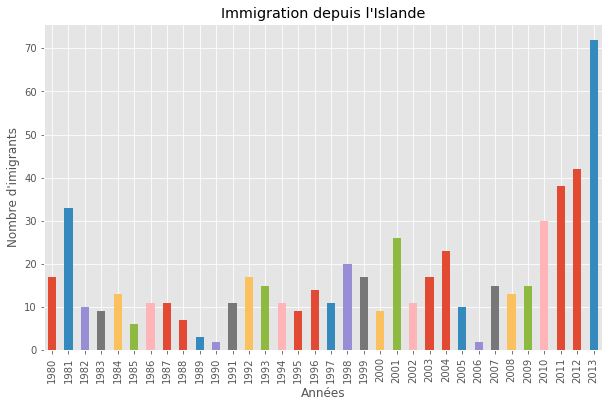

In [21]:
# Extractation des données
Iceland = canada.loc['Iceland']
Iceland.drop(['Continent', 'Region','Total'], inplace=True)

#Création du graphique
Iceland.plot(kind='bar', figsize=(10, 6))

#Titre et légendes
plt.xlabel('Années')
plt.ylabel('Nombre d\'imigrants')
plt.title('Immigration depuis l\'Islande')

#Visualisation
plt.show()

L'islande a connu une grave crise financière de 2008 et les effets sont clairement visibles sur le graphique. On voit, en effet, une nette augmentation du nombre d'immigrants islandais après 2008.

L'idée, ici, est d'ajouter une flèche entre la barre 2008 et celle de 2013.

En utilisant la méthode `annotate` et les paramètres suivants :
- `s`: str, ttexte de l'annotation.
- `xy`: Tuple :  coordonnées du point à annoter(pointe de la flèche).
- `xytext`: Tuple : coordonnées du point de départ du texte (départ de la flèche).

- `arrowprops`: Dictionnaire de définition de la flèche:
    - `arrowstyle`: Style de la flèche, `'->'` : pointe standard.
    - `connectionstyle`: Type de trait. `arc3` est une ligne droite.
    - `color`: Couleur de la flèche.
    - `lw`: Epaisseur du trait.

Plus d'infos sur : 
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate.

Ajouter un texte le long de la flèche : Crise financière de 2008 - 2011.
Paramètres à utiliser : 

rotation: Rotation du texte (sens direct)
va: alignement vertical [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
ha: alignement horisontal [‘center’ | ‘right’ | ‘left’]

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\generic.py:3114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(obj)


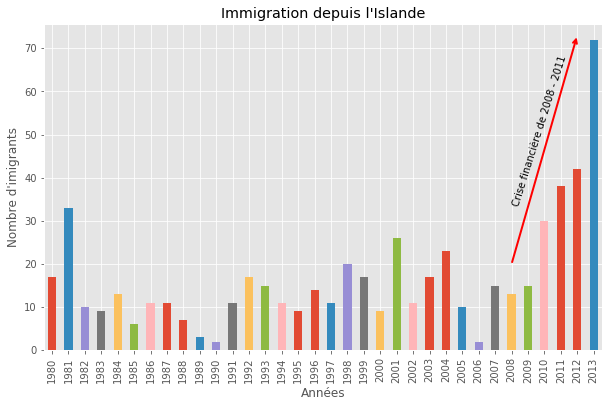

In [22]:
# Extractation des données
Iceland = canada.loc['Iceland']
Iceland.drop(['Continent', 'Region','Total'], inplace=True)

#Création du graphique
Iceland.plot(kind='bar', 
             figsize=(10, 6), 
             rot=90)

#Titre et légendes
plt.xlabel('Années')
plt.ylabel('Nombre d\'imigrants')
plt.title('Immigration depuis l\'Islande')

#Méthode annotate flèche
plt.annotate('', 
             xy=(32, 73),             
             xytext=(28, 20),         
             xycoords='data',         
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2)
            )

#Méthode annotate texte
plt.annotate('Crise financière de 2008 - 2011', 
             xy=(28, 33),                    
             rotation=72.5,                  
             va='bottom',                    
             ha='left'                      
            )

#Visualisation
plt.show()

**2. Diagramme à batôns horizontal**

Lorsque les étiquettes de l'axe des abscisses sont des textes nécessitant plus de place, il est plus confortable d'utiliser les diagrammes horisontaux.


**Question:** 
A partir du dataFrame `df_can` dataset, créer un diagramme à bâtons *horizontal* représentant les 15 pays ayant eu le plus grand nombre *total* d'immigrants au Canada, de 1980 à 2013. Faire apparaître le nombre d'immigrants sur les barres.
*Indication* : Faire une boucle sur les pays et utiliser la méthode annotate

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


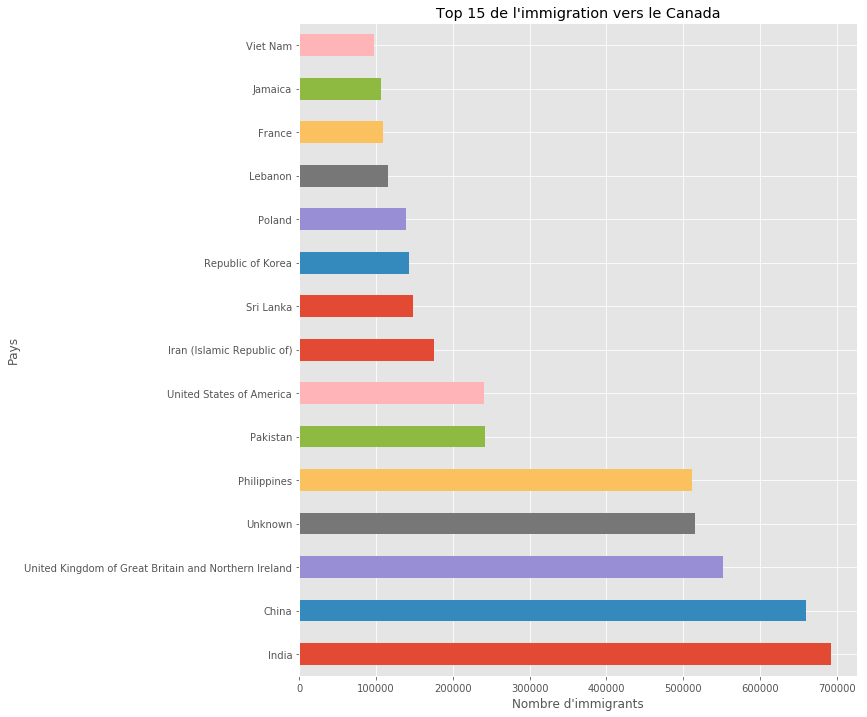

In [24]:
#Extraction des données
canada.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top15 = canada.head(16)
top15.drop(['Continent', 'Region'], axis=1, inplace=True)
top15=top15.iloc[1::,34]
top15

#Création du graphique
top15.plot(kind='barh', 
           figsize=(10, 12), 
           rot=360
          )

#Titre et légendes 
plt.xlabel('Nombre d\'immigrants')
plt.ylabel('Pays')
plt.title('Top 15 de l\'immigration vers le Canada')

#Méthode annotate
def autolabel(top15, xpos='center'):
    
    xpos = xpos.lower()  
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43} 

    for rect in top15:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')

#Visualisation
plt.show()

<hr>
Copyright &copy; 2018 Hatem & Driss @NEEDEMAND